In [192]:
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
# import dataset
from sklearn.datasets import load_breast_cancer
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [6]:
cancer = load_breast_cancer()

### Understanding the dataset

In [7]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Train-Test Split and further processing

In [8]:
# you need to specify the X and Y as the first two variables
# after that, specify the test size and train size by passing the params test_size or train_size; 0 < x < 1.
# you can also specify stratify. This is only applicable to categorical variables
# specify random state for reproducible results
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], test_size=0.25, stratify=cancer['target'], random_state=0)
print(X_train.shape)
print(X_test.shape)


In [162]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [177]:
np.set_printoptions(suppress=True)
print("Before Min-Max Scaling")
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print("After Min-Max Scaling")
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

print("\nThe scaler using Min-Max Scaling trained by the Train set should be applied to the test set")
print(X_test_scaled)
print(X_test_scaled[(X_test_scaled < 0) | (X_test_scaled > 1)])

np.set_printoptions(suppress=False)

Before Min-Max Scaling
[  7.691       9.71       47.92      170.4         0.05263     0.01938
   0.          0.          0.106       0.04996     0.1115      0.3602
   0.757       6.802       0.002667    0.002252    0.          0.
   0.009539    0.0008948   8.678      12.02       54.49      223.6
   0.08125     0.03432     0.          0.          0.1566      0.05525  ]
[  28.11      39.28     188.5     2501.         0.1425     0.3454
    0.3754     0.1913     0.304      0.09744    2.873      3.896
   21.98     542.2        0.03113    0.1354     0.3038     0.0409
    0.07895    0.02193   36.04      49.54     251.2     4254.
    0.2226     0.9379     1.252      0.2903     0.6638     0.173  ]
After Min-Max Scaling
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

The scaler using Min-Max Scaling trained by the Train set should be applied to the test set
[

### K-Nearest Classifier

In [9]:
training_accuracy = []
testing_accuracy = []
neighbour_settings = range(1,50)

for i in neighbour_settings:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    testing_accuracy.append(clf.score(X_test, y_test))


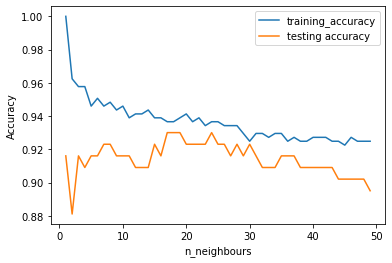

In [10]:
plt.plot(neighbour_settings, training_accuracy, label="training_accuracy")
plt.plot(neighbour_settings, testing_accuracy, label="testing accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbours")
plt.legend()
plt.show()

In [83]:
# KNeighbours does not have decision function
clf.decision_function(X_test)

AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

### Logistic Regression

In [11]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# By default, logistic regression applies an L2 regularisation (i.e. Ridge-like)
# solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
# Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

logreg0001 = LogisticRegression(C=0.001, max_iter=10000).fit(X_train, y_train)
logreg001 = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
logreg01 = LogisticRegression(C=0.1, max_iter=10000).fit(X_train, y_train)
logreg = LogisticRegression(C=1, max_iter=10000).fit(X_train, y_train)
logreg10 = LogisticRegression(C=10, max_iter=10000).fit(X_train, y_train)
logreg100 = LogisticRegression(C=100, max_iter=10000).fit(X_train, y_train)

In [12]:
print("Training set score for logreg0001: ", round(logreg0001.score(X_train, y_train)*100, 2))
print("Testing set score logreg0001", round(logreg0001.score(X_test, y_test)*100, 2))
print("Training set score for logreg001: ", round(logreg001.score(X_train, y_train)*100, 2))
print("Testing set score logreg001", round(logreg001.score(X_test, y_test)*100, 2))
print("Training set score for logreg01: ", round(logreg01.score(X_train, y_train)*100, 2))
print("Testing set score logreg01", round(logreg01.score(X_test, y_test)*100, 2))
print("Training set score for logreg: ", round(logreg.score(X_train, y_train)*100, 2))
print("Testing set score logreg", round(logreg.score(X_test, y_test)*100, 2))
print("Training set score for logreg10: ", round(logreg10.score(X_train, y_train)*100, 2))
print("Testing set score logreg10", round(logreg10.score(X_test, y_test)*100, 2))
print("Training set score for logreg100: ", round(logreg100.score(X_train, y_train)*100, 2))
print("Testing set score logreg100", round(logreg100.score(X_test, y_test)*100, 2))

Training set score for logreg0001:  95.07
Testing set score logreg0001 93.01
Training set score for logreg001:  95.54
Testing set score logreg001 95.1
Training set score for logreg01:  95.77
Testing set score logreg01 93.71
Training set score for logreg:  96.71
Testing set score logreg 93.71
Training set score for logreg10:  97.89
Testing set score logreg10 93.01
Training set score for logreg100:  98.12
Testing set score logreg100 94.41


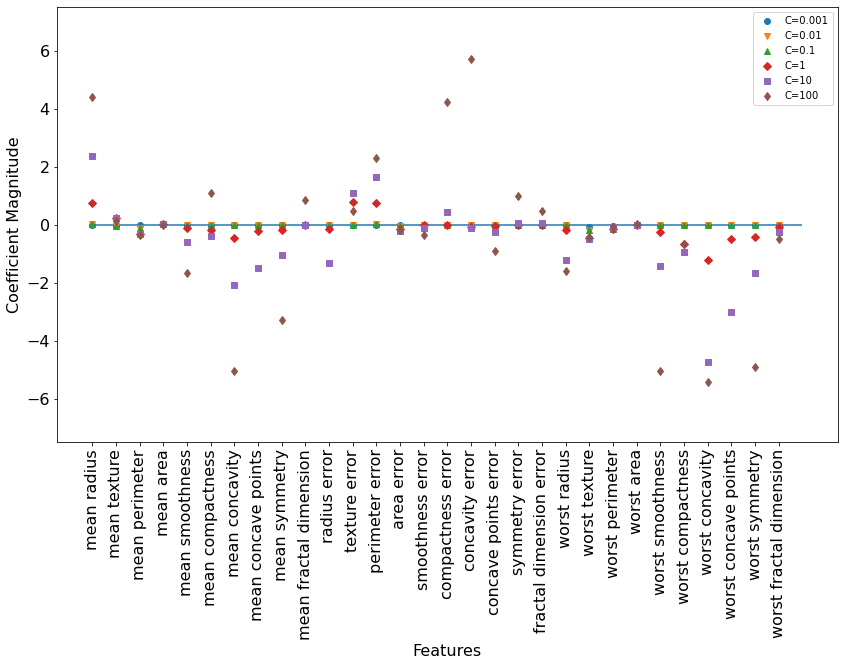

In [13]:
plt.figure(figsize=(14,8))

# Point plots
plt.plot(logreg0001.coef_.T, 'o', label="C=0.001")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")
plt.plot(logreg001.coef_.T, '^', label="C=0.1")
plt.plot(logreg.coef_.T, "D", label="C=1")
plt.plot(logreg10.coef_.T, "s", label="C=10")
plt.plot(logreg100.coef_.T, "d",label="C=100")
plt.hlines(0, 0, cancer['data'].shape[1])

# Plot Size
plt.ylim(-7.5, 7.5)

# Ticks and Labels
plt.xticks(range(cancer['data'].shape[1]), cancer['feature_names'], rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Features", fontsize=16)
plt.ylabel("Coefficient Magnitude", fontsize=16)

plt.legend()
plt.show()

In [14]:
# Applying L1 Regularisation (i.e. Lasso-like)
logreg0001_l1 = LogisticRegression(C=0.001, penalty = "l1", solver="liblinear", max_iter=10000).fit(X_train, y_train)
logreg001_l1 = LogisticRegression(C=0.01, penalty = "l1", solver="liblinear", max_iter=10000).fit(X_train, y_train)
logreg01_l1 = LogisticRegression(C=0.1, penalty = "l1", solver="liblinear", max_iter=10000).fit(X_train, y_train)
logreg_l1 = LogisticRegression(C=1, penalty = "l1", solver="liblinear", max_iter=10000).fit(X_train, y_train)
logreg10_l1 = LogisticRegression(C=10, penalty = "l1", solver="liblinear", max_iter=10000).fit(X_train, y_train)
logreg100_l1 = LogisticRegression(C=100, penalty = "l1", solver="liblinear", max_iter=10000).fit(X_train, y_train)

In [15]:
print("Training set score for logreg0001: ", round(logreg0001_l1.score(X_train, y_train)*100, 2))
print("Testing set score logreg0001", round(logreg0001_l1.score(X_test, y_test)*100, 2))
print("Training set score for logreg001: ", round(logreg001_l1.score(X_train, y_train)*100, 2))
print("Testing set score logreg001", round(logreg001_l1.score(X_test, y_test)*100, 2))
print("Training set score for logreg01: ", round(logreg01_l1.score(X_train, y_train)*100, 2))
print("Testing set score logreg01", round(logreg01_l1.score(X_test, y_test)*100, 2))
print("Training set score for logreg: ", round(logreg_l1.score(X_train, y_train)*100, 2))
print("Testing set score logreg", round(logreg_l1.score(X_test, y_test)*100, 2))
print("Training set score for logreg10: ", round(logreg10_l1.score(X_train, y_train)*100, 2))
print("Testing set score logreg10", round(logreg10_l1.score(X_test, y_test)*100, 2))
print("Training set score for logreg100: ", round(logreg100_l1.score(X_train, y_train)*100, 2))
print("Testing set score logreg100", round(logreg100_l1.score(X_test, y_test)*100, 2))

Training set score for logreg0001:  92.02
Testing set score logreg0001 92.31
Training set score for logreg001:  92.02
Testing set score logreg001 90.91
Training set score for logreg01:  94.37
Testing set score logreg01 91.61
Training set score for logreg:  96.95
Testing set score logreg 93.71
Training set score for logreg10:  97.89
Testing set score logreg10 94.41
Training set score for logreg100:  99.3
Testing set score logreg100 93.71


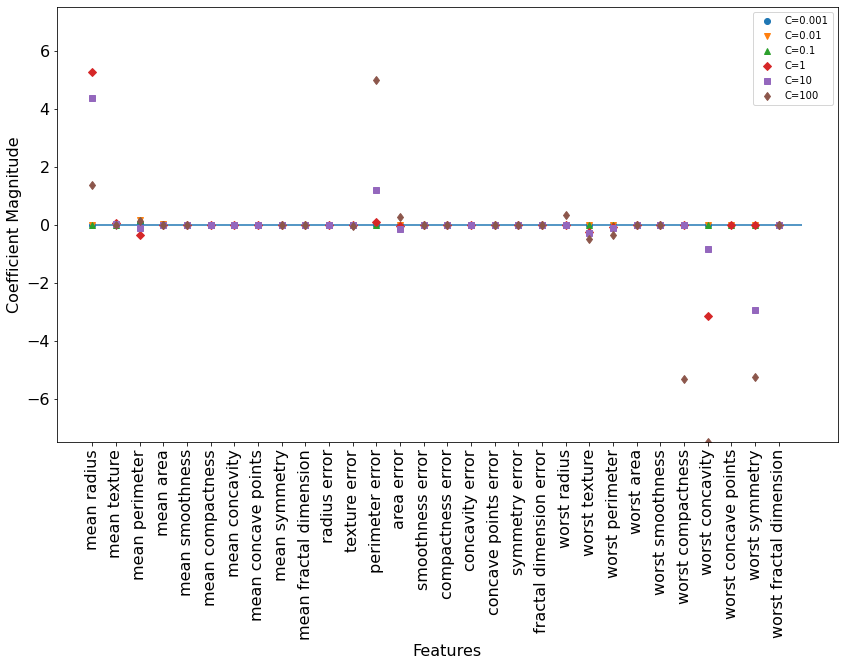

In [16]:
plt.figure(figsize=(14,8))

# Point plots
plt.plot(logreg0001_l1.coef_.T, 'o', label="C=0.001")
plt.plot(logreg001_l1.coef_.T, 'v', label="C=0.01")
plt.plot(logreg001_l1.coef_.T, '^', label="C=0.1")
plt.plot(logreg_l1.coef_.T, "D", label="C=1")
plt.plot(logreg10_l1.coef_.T, "s", label="C=10")
plt.plot(logreg100_l1.coef_.T, "d",label="C=100")
plt.hlines(0, 0, cancer['data'].shape[1])

# Plot Size
plt.ylim(-7.5, 7.5)

# Ticks and Labels
plt.xticks(range(cancer['data'].shape[1]), cancer['feature_names'], rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Features", fontsize=16)
plt.ylabel("Coefficient Magnitude", fontsize=16)

plt.legend()
plt.show()

In [89]:
print(cancer['target'][:5])
print(cancer['target_names'])

[0 0 0 0 0]
['malignant' 'benign']


In [98]:
# Logistic Regression has decision function & predict_proba
print(logreg10.decision_function(X_test)[:5])
print(np.argmax(logreg10.predict_proba(X_test)[:5], axis=1))
print(logreg10.predict(X_test)[:5])

[  5.29065011 -11.91439847 -13.35910094   8.10944562  -7.94960668]
[1 0 0 1 0]
[1 0 0 1 0]


### Decision Tree

In [17]:
# In scikit-learn, only pre-pruning can be done.
# pre-pruning e.g. max_depth, min_samples_split, ccp_alpha, max_lead_nodes, min_samples_leaf

# By default, the tree will grow into its maximum
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [18]:
print("Training Set accuracy")
print(tree.score(X_train, y_train))
print("Testing Set accuracy")
print(tree.score(X_test, y_test))

Training Set accuracy
1.0
Testing Set accuracy
0.9020979020979021


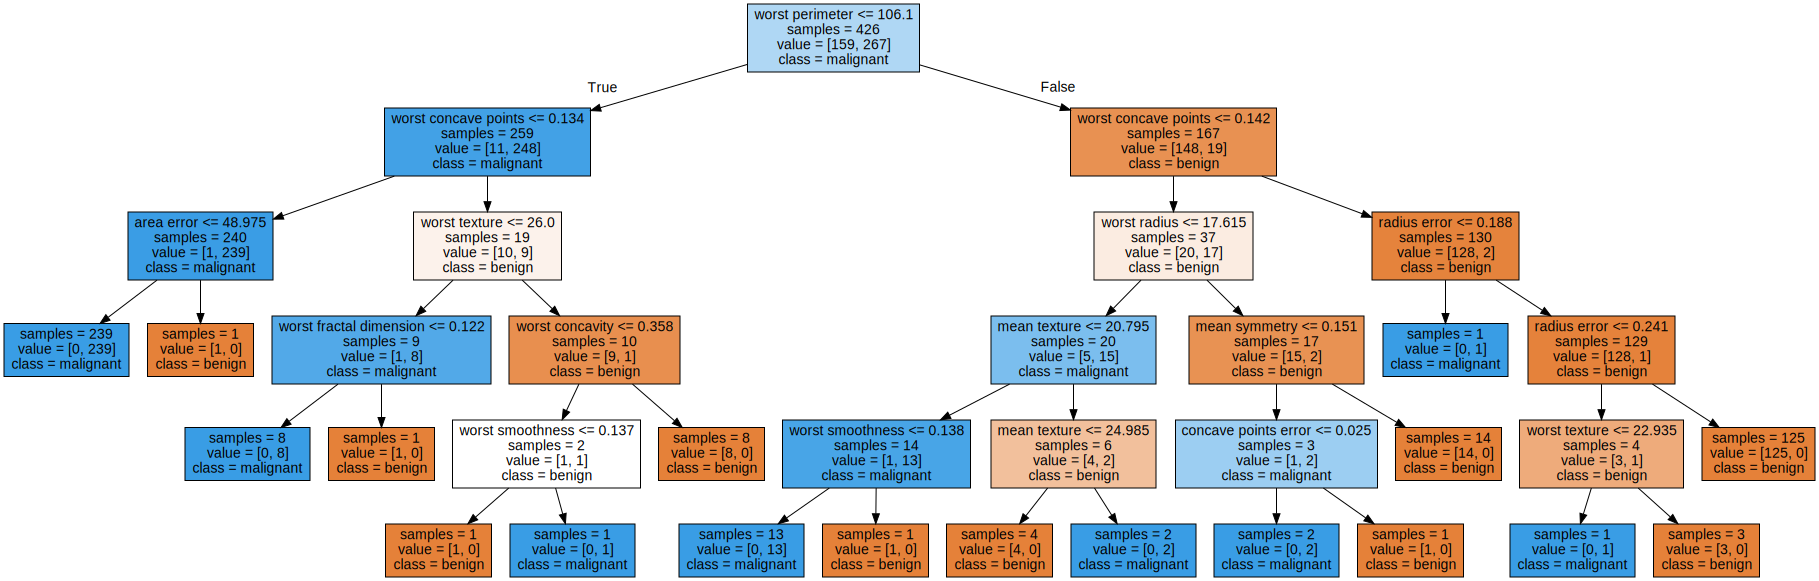

In [22]:
export_graphviz(tree, out_file="tree_max.dot", class_names=['benign', 'malignant'], feature_names=cancer['feature_names'], impurity=False, filled=True)
with open("tree_max.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [23]:
tree_4 = DecisionTreeClassifier(max_depth=4,random_state=0)
tree_4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [24]:
print("Training Set accuracy")
print(tree_4.score(X_train, y_train))
print("Testing Set accuracy")
print(tree_4.score(X_test, y_test))

Training Set accuracy
0.9859154929577465
Testing Set accuracy
0.9090909090909091


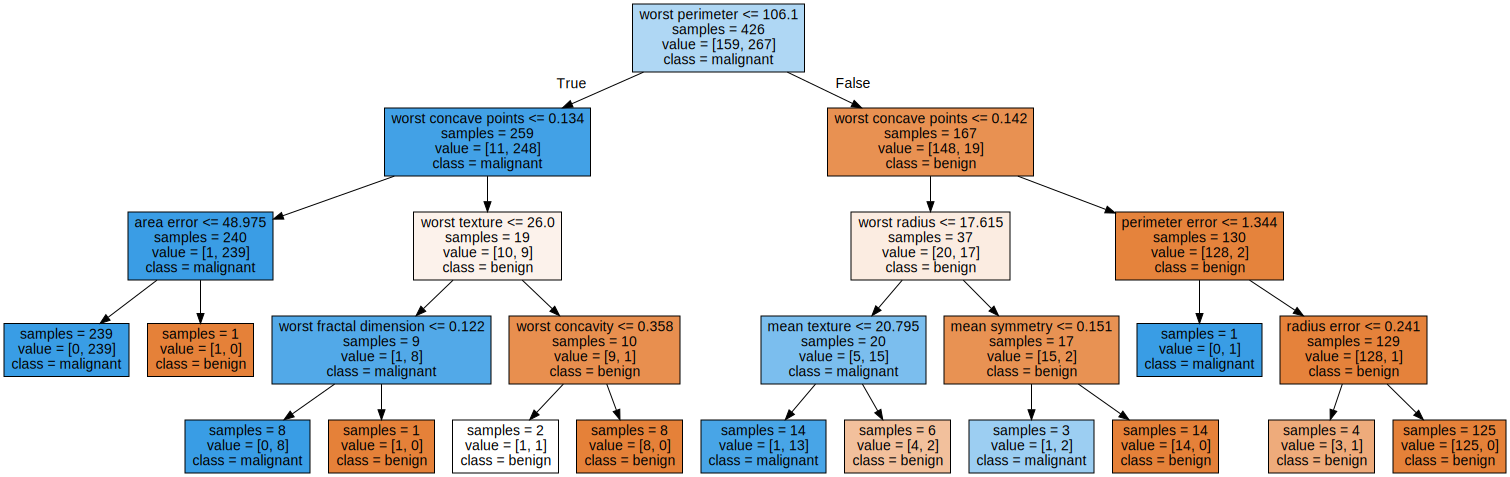

In [25]:
export_graphviz(tree_4, out_file="tree_4_max.dot", class_names=['benign', 'malignant'], feature_names=cancer['feature_names'], impurity=False, filled=True)
with open("tree_4_max.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Feature Importance

In [27]:
print(tree_4.feature_importances_)


[0.         0.01558601 0.         0.         0.         0.
 0.         0.         0.01150064 0.         0.00253726 0.
 0.01023272 0.01043016 0.         0.         0.         0.
 0.         0.         0.03848579 0.03087626 0.75708572 0.
 0.         0.         0.00418952 0.10976588 0.         0.00931004]


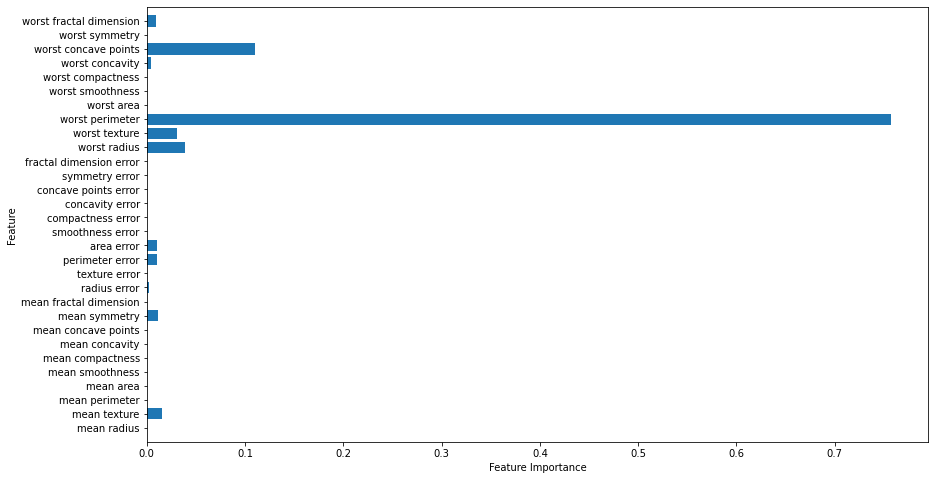

In [35]:
def plot_feature_importances_cancer(model):
    n_features = cancer['data'].shape[1] # 569 x 30
    plt.figure(figsize=(14,8))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer['feature_names'])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree_4)

In [104]:
# There is no decision_function in 
print(np.argmax(tree_4.predict_proba(X_test)[:5], axis=1))
print(tree_4.predict(X_test[:5]))

[1 0 0 1 0]
[1 0 0 1 0]


### Random Forests

In [37]:
cancer['feature_names'].shape

(30,)

In [115]:
forest = RandomForestClassifier(n_estimators=100, max_features=5, random_state=0).fit(X_train, y_train)


In [116]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.9976525821596244
0.9440559440559441


In [50]:
forest.feature_importances_

array([0.02969122, 0.01720923, 0.06929807, 0.04112995, 0.00500449,
       0.00636883, 0.08056202, 0.09200666, 0.00435231, 0.0042842 ,
       0.02136349, 0.00420529, 0.01354811, 0.02303752, 0.00288949,
       0.00593161, 0.00468708, 0.0027883 , 0.003081  , 0.00229185,
       0.12542246, 0.01704882, 0.19536571, 0.0743788 , 0.00948886,
       0.0086519 , 0.02172119, 0.10149821, 0.00399358, 0.00869974])

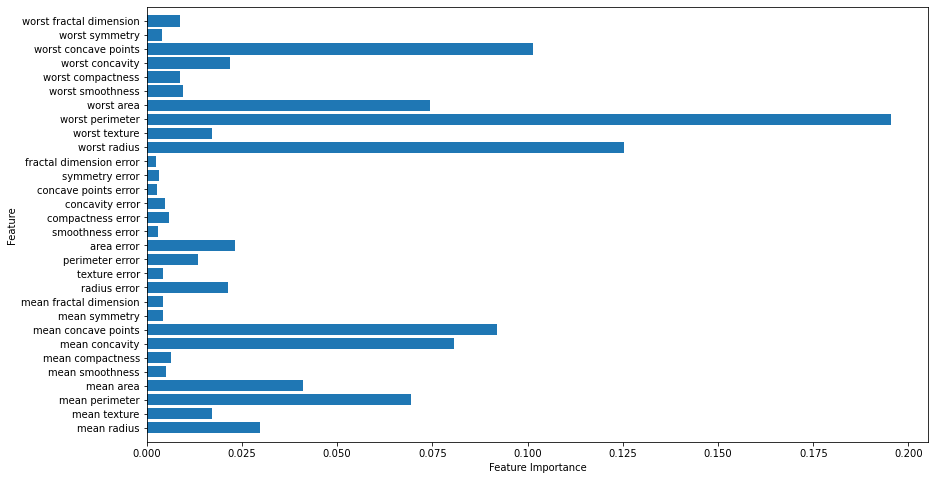

In [51]:
plot_feature_importances_cancer(forest)

"""
Top 3 most important features are:
1. 'worst perimeter'
2. 'worst radius'
3. 'worst concave points'
"""

In [120]:
print(np.argmax(forest.predict_proba(X_test)[:10], axis=1))
print(forest.predict(X_test)[:10])

[1 0 0 1 0 1 0 0 0 1]
[1 0 0 1 0 1 0 0 0 1]


### Gradient Boosted Regression Trees (GBRT)

In [54]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
"""
Default parameters:
learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
max_depth=3, random_state=None, max_features=None, verbose=0
"""

gbrt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, verbose=1, random_state=0)
gbrt.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.1472            0.42s
         2           1.0089            0.31s
         3           0.8930            0.29s
         4           0.7943            0.28s
         5           0.7089            0.27s
         6           0.6337            0.26s
         7           0.5680            0.25s
         8           0.5112            0.24s
         9           0.4624            0.23s
        10           0.4188            0.23s
        20           0.1609            0.18s
        30           0.0703            0.16s
        40           0.0362            0.13s
        50           0.0201            0.11s
        60           0.0122            0.09s
        70           0.0074            0.06s
        80           0.0045            0.04s
        90           0.0030            0.02s
       100           0.0020            0.00s


GradientBoostingClassifier(random_state=0, verbose=1)

In [56]:
print("Training set accuracy")
print(gbrt.score(X_train, y_train))
print("Testing set accuracy")
print(gbrt.score(X_test, y_test))

Training set accuracy
1.0
Testing set accuracy
0.958041958041958


In [58]:
gbrt_1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, verbose=1, random_state=0)
gbrt_1.fit(X_train, y_train)

print("Training set accuracy")
print(gbrt_1.score(X_train, y_train))
print("Testing set accuracy")
print(gbrt_1.score(X_test, y_test))

      Iter       Train Loss   Remaining Time 
         1           1.1835            0.18s
         2           1.0696            0.14s
         3           0.9750            0.13s
         4           0.8917            0.13s
         5           0.8227            0.13s
         6           0.7599            0.12s
         7           0.7076            0.12s
         8           0.6586            0.12s
         9           0.6141            0.11s
        10           0.5756            0.11s
        20           0.3511            0.09s
        30           0.2548            0.07s
        40           0.2011            0.06s
        50           0.1694            0.05s
        60           0.1468            0.04s
        70           0.1301            0.03s
        80           0.1180            0.02s
        90           0.1083            0.01s
       100           0.0992            0.00s
Training set accuracy
0.9953051643192489
Testing set accuracy
0.965034965034965


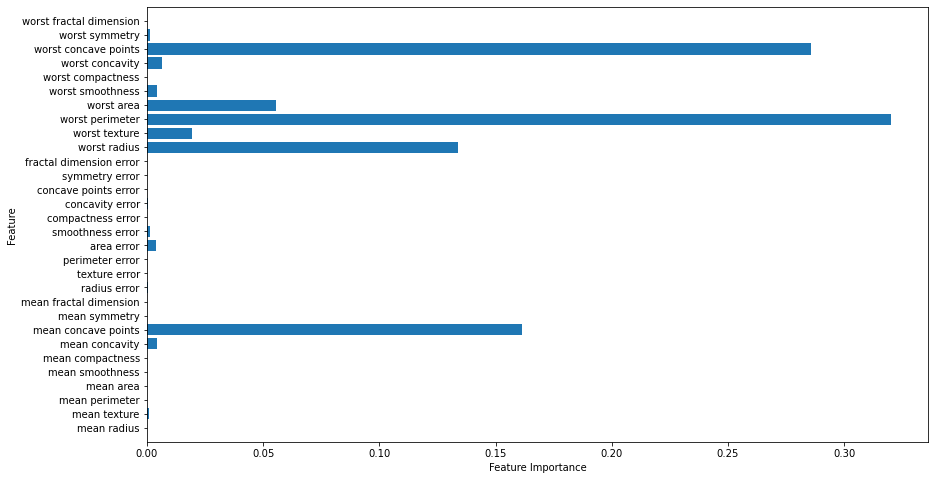

In [59]:
plot_feature_importances_cancer(gbrt_1)

In [130]:
print(gbrt_1.decision_function(X_test)[:10].astype('int16'))
print(np.argmax(gbrt_1.predict_proba(X_test)[:10], axis=1))
print(gbrt_1.predict(X_test)[:10])

[ 3 -4 -5  3 -1  3 -5 -5 -5  4]
[1 0 0 1 0 1 0 0 0 1]
[1 0 0 1 0 1 0 0 0 1]


### Support Vector Machines (SVMs)

In [138]:
svc = SVC(probability=True).fit(X_train, y_train)

In [139]:
print("Training set accuracy")
print(svc.score(X_train, y_train))
print("Testing set accuracy")
print(svc.score(X_test, y_test))

Training set accuracy
0.9225352112676056
Testing set accuracy
0.916083916083916


Text(0, 0.5, 'Feature Magnitude')

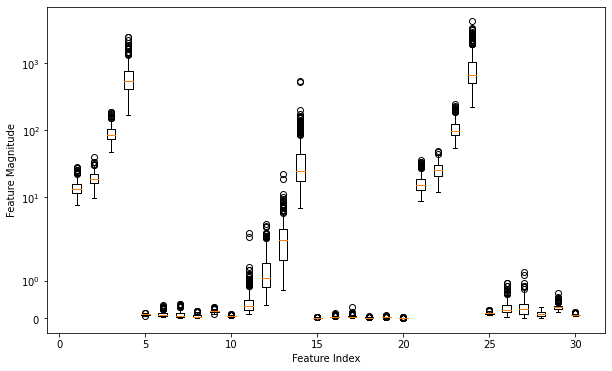

In [140]:
plt.figure(figsize=(10,6))
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature Index")
plt.ylabel("Feature Magnitude")

In [141]:
# Performing min-max scaling
min_on_training = X_train.min(axis=0)
range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training)/range_on_training
X_test_scaled = (X_test - min_on_training)/range_on_training

In [142]:
svc_2 = SVC(probability=True).fit(X_train_scaled, y_train)

In [143]:
print("Training set accuracy")
print(svc_2.score(X_train_scaled, y_train))
print("Testing set accuracy")
print(svc_2.score(X_test_scaled, y_test))

Training set accuracy
0.9906103286384976
Testing set accuracy
0.9440559440559441


In [147]:
print(svc_2.decision_function(X_test)[:10].round(2))
print(np.argmax(svc_2.predict_proba(X_test)[:10], axis=1))
print(svc_2.predict(X_test)[:10])

[-0.36 -0.36 -0.36 -0.36 -0.36 -0.36 -0.36 -0.36 -0.36 -0.36]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


### Principal Component Analysis

In [179]:
scaler_std_pca = StandardScaler()
scaler_std_pca.fit(cancer['data'])
x_scaled_pca = scaler.transform(cancer['data'])

In [182]:
x_scaled_pca.shape

(569, 30)

In [184]:
pca = PCA(n_components=2)
pca.fit(x_scaled_pca)
x_pca = pca.transform(x_scaled_pca)

In [187]:
x_pca.shape

(569, 2)

In [197]:
df = pd.DataFrame(x_pca, columns = ['pca_1', 'pca_2'])
df = df.merge(pd.DataFrame(cancer['target'], columns=['target']), left_index=True, right_index=True)

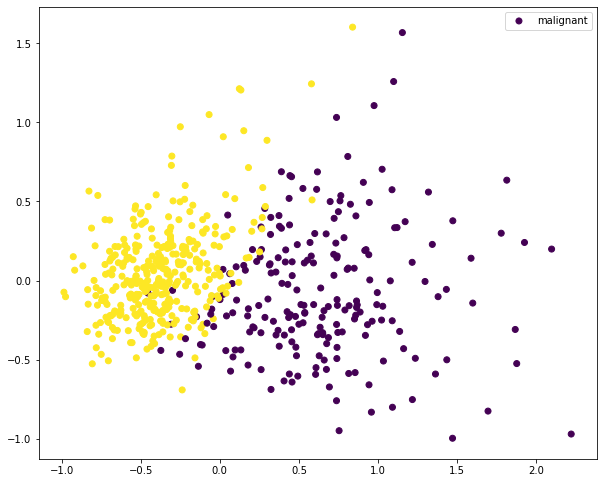

In [208]:
plt.figure(figsize=(10,10))
plt.scatter('pca_1', 'pca_2', data = df, c='target')
plt.legend(cancer['target_names'], loc='best')
plt.gca().set_aspect("equal")